# Alzheimer's Disease Prediction

## Introduction & Background

Alzheimer's disease is a progressive neurodegenerative disorder that primarily affects the brain, leading to memory loss, cognitive decline, and eventually an inability to carry out even the simplest tasks. It’s the most common cause of dementia among older adults ([National Institute on Aging](https://www.nia.nih.gov/health/alzheimers-and-dementia/alzheimers-disease-fact-sheet)).

According to the [Alzheimer's Association](https://www.alz.org/alzheimers-dementia), as of 2023, an estimated 6.7 million Americans are living with Alzheimer's disease. This number is expected to increase to 13.8 million by 2060. Globally, it is estimated that over 55 million people worldwide have dementia, with Alzheimer's disease being the most common form. As of 2025, Alzheimer's disease affects a significant portion of the population both in the United States and globally. The global number of people with dementia is expected to **reach 139 million by 2050**, with much of this increase occurring in developing countries ([Alzheimer's Disease International](https://www.alzint.org/about/dementia-facts-figures/dementia-statistics/)).

These statistics highlight the growing impact of Alzheimer's disease on individuals, families, and healthcare systems worldwide.

## Project Topic

The project will focus on analyzing Alzheimer's disease using publicly available data to:
- Analyze the factors associated with the disease and perform statistical data analysis
- Use Supervised Machine Learning techniques to predict the risk of disease given patient health information
- TODO: Add ML Algorithms

### Goal

The main goal and motivation behind this project is to closely understand health information factors that could be contributing to the early onset of Alzheimer's disease. The predictive analysis will be helpful to patients who are on the cusp of being diagnosed with Alzheimer's.

### Expected Outcomes & Learnings

- Brief understanding of how various factors affect the diagnoses of Alzheimer's
- How Supervised Machine Learning can be applied to these types of problems?
- Given certain health factors for a patient, how well can ML techniques be used to predict early onset of Alzheimer's


## Datasets

- This project will be using publicly available data from Kaggle for [Alzheimer's Disease Dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset)
- Per datasource, this data was generated synthetically and released on Kaggle for educational purposes.
- The dataset includes major health factors and diagnosis for each patient, which makes it ideal for Supervised Machine Learning tasks.

## Dataset Description

- Contains 35 columns and 2149 rows
- Contains both categorical and continuous variables

The Name:Description of the dataset attribute below copied over from the [Alzheimer's Disease Dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset).

| Name                      | Description                                                                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| PatientID                 | A unique identifier assigned to each patient (4751 to 6900).                                                                                |
| Age                       | The age of the patients ranges from 60 to 90 years.                                                                                         |
| Gender                    | Gender of the patients, where 0 represents Male and 1 represents Female.                                                                    |
| Ethnicity                 | The ethnicity of the patients, coded as follows                                                                                             |
| 0                         | Caucasian                                                                                                                                   |
| 1                         | African American                                                                                                                            |
| 2                         | Asian                                                                                                                                       |
| 3                         | Other                                                                                                                                       |
| EducationLevel            | The education level of the patients, coded as follows                                                                                       |
| 0                         | None                                                                                                                                        |
| 1                         | High School                                                                                                                                 |
| 2                         | Bachelor's                                                                                                                                  |
| 3                         | Higher                                                                                                                                      |
| BMI                       | Body Mass Index of the patients, ranging from 15 to 40.                                                                                     |
| Smoking                   | Smoking status, where 0 indicates No and 1 indicates Yes.                                                                                   |
| AlcoholConsumption        | Weekly alcohol consumption in units, ranging from 0 to 20.                                                                                  |
| PhysicalActivity          | Weekly physical activity in hours, ranging from 0 to 10.                                                                                    |
| DietQuality               | Diet quality score, ranging from 0 to 10.                                                                                                   |
| SleepQuality              | Sleep quality score, ranging from 4 to 10.                                                                                                  |
| FamilyHistoryAlzheimers   | Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.                                                            |
| CardiovascularDisease     | Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.                                                               |
| Diabetes                  | Presence of diabetes, where 0 indicates No and 1 indicates Yes.                                                                             |
| Depression                | Presence of depression, where 0 indicates No and 1 indicates Yes.                                                                           |
| HeadInjury                | History of head injury, where 0 indicates No and 1 indicates Yes.                                                                           |
| Hypertension              | Presence of hypertension, where 0 indicates No and 1 indicates Yes.                                                                         |
| SystolicBP                | Systolic blood pressure, ranging from 90 to 180 mmHg.                                                                                       |
| DiastolicBP               | Diastolic blood pressure, ranging from 60 to 120 mmHg.                                                                                      |
| CholesterolTotal          | Total cholesterol levels, ranging from 150 to 300 mg/dL.                                                                                    |
| CholesterolLDL            | Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.                                                                   |
| CholesterolHDL            | High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.                                                                  |
| CholesterolTriglycerides  | Triglycerides levels, ranging from 50 to 400 mg/dL.                                                                                         |
| MMSE                      | Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.                                      |
| FunctionalAssessment      | Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.                                                |
| MemoryComplaints          | Presence of memory complaints, where 0 indicates No and 1 indicates Yes.                                                                    |
| BehavioralProblems        | Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.                                                                  |
| ADL                       | Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment. Lower scores indicate greater impairment. |
| Confusion                 | Presence of confusion, where 0 indicates No and 1 indicates Yes.                                                                            |
| Disorientation            | Presence of disorientation, where 0 indicates No and 1 indicates Yes.                                                                       |
| PersonalityChanges        | Presence of personality changes, where 0 indicates No and 1 indicates Yes.                                                                  |
| DifficultyCompletingTasks | Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.                                                          |
| Forgetfulness             | Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.                                                                        |
| Diagnosis                 | Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.                                                         |
| DoctorInCharge            | This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.                   |



### Data Sources Citation (APA)

- Rabie El Kharoua. (2024). Alzheimer's Disease Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8668279



# Import Required Packages

In [47]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset
This cell imports the required libraries and prepares the dataset for analysis. Data will be directly imported from Kaggle Hub using the library `kagglehub`

In [67]:
dataset_path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")
print("Path to dataset files:", dataset_path)
df = pd.read_csv(f'{dataset_path}/alzheimers_disease_data.csv')

# Let's check the first five rows of the data
df.head()

Path to dataset files: /Users/am368a/.cache/kagglehub/datasets/rabieelkharoua/alzheimers-disease-dataset/versions/1


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# Data Cleaning

## Drop Columns
Lookign at at the first 5 rows, we can see that `DoctorInCharge` has a dummy data `XXXConfig` and it does not really contirbute to disease features. 
Similarly `PatientID` is PII(Personal Identifiable Information) for the patient which is not required for disease prediction. 

Let's go ahead and drop these two columns before further analysis 




In [51]:
data = df.drop(['PatientID', 'DoctorInCharge'], axis=1)
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


## Check Missing Values (Null/NaN)

In [52]:
null_values = data.isnull().sum()
null_values


Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [53]:
# Display the first few rows


Dataset has no `null` or `NaN` values in any of the columns. This is verified using the non0null column size which is `2149` which is equal to number of observations

## Check Data Types

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

## Check Duplicate Rows

In [55]:
dup_rows = data.duplicated(keep=False)
data.loc[dup_rows]

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis


Dataset has no duplicate data

In [56]:
data.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Inspect Target Variable 

Looking closley at the columns our target variable of interest would be `Diagnosis` which is 0 for negative diagnosis (No Alzheimer's) and 1 for positive diagnosis (Alzheimer's). 
Let's separate out our `target variable` and `features`


In [57]:
target_column = 'Diagnosis'

X = data.drop([target_column], axis=1)
y = data[target_column]


print(f'features shape = {X.shape} | target shape = {y.size}')


features shape = (2149, 32) | target shape = 2149


In [58]:
X.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,21.463532,6.518877,0,0,1.725883,0,0,0,1,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,20.613267,7.118696,0,0,2.592424,0,0,0,0,1
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,7.356249,5.895077,0,0,7.119548,0,1,0,1,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,13.991127,8.965106,0,1,6.481226,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,13.517609,6.045039,0,0,0.014691,0,0,1,1,0


# Check Class Imbalance


In [59]:
y.value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

**This code defines a function `visualize_class_imbalance` to visualize class imbalance in a dataset's target variable by generating a pie chart and a count plot. The function uses Matplotlib and Seaborn for these visualizations.**

In [71]:
# Ref: https://www.youtube.com/watch?v=HJ0Av9xkPA8

def visualize_class_imbalance(df, target_variable):
    """
    Visualizes class imbalance in a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_variable (str): The name of the target variable column.
    """

    target = df[target_variable]
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Pie Plot
    plot_colors = ['skyblue', 'lightcoral']
    axes[0].pie(target.value_counts(), labels=target.value_counts().index, colors=plot_colors, autopct='%1.1f%%')
    axes[0].set_title(f'{target_variable} | Class Distribution (Pie Plot)')

    # Count Plot
    sns.countplot(x=target_column, hue=target_column, data=df, palette=sns.color_palette(plot_colors), ax=axes[1], legend=False)
    axes[1].set_title(f'{target_variable} | Class Distribution (Count Plot)')

    plt.tight_layout()
    plt.show()

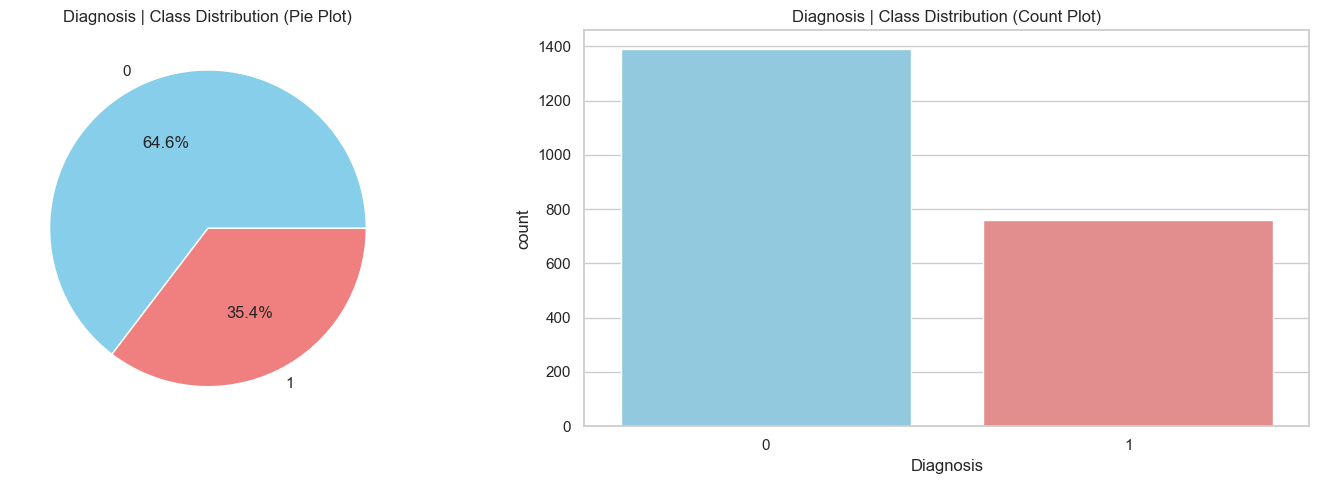

In [72]:

visualize_class_imbalance(data, target_column)

## Data Cleaning Summary

- Dropped unnecessary columns to simplify the dataset.
- Checked for Missing Values (Null/NaN) and handled them appropriately.
- Verified and adjusted data types for consistency and compatibility.
- Checked for duplicate rows and removed them to ensure data integrity.
- Inspected the target variable to understand its distribution and properties.
- Checked for class imbalance to ensure balanced data for modeling.



# Exploratory Data Analysis (EDA)

## Correlation Matrix

In [75]:
# Display the correlation matrix in an easy-to-read format
corr = data.corr()

# Round the values to 2 decimal places for better readability
formatted_corr = corr.round(2)

# Display the correlation matrix
formatted_corr

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.00,0.03,0.03,-0.06,-0.02,0.02,0.01,-0.01,-0.02,0.05,...,0.01,0.01,0.04,-0.04,0.01,0.03,-0.01,0.01,-0.02,-0.01
Gender,0.03,1.00,-0.00,-0.01,0.01,0.02,0.00,-0.04,0.01,0.01,...,0.03,0.00,0.01,0.00,-0.03,0.02,0.03,-0.00,-0.03,-0.02
Ethnicity,0.03,-0.00,1.00,0.03,-0.00,0.03,0.01,0.02,-0.02,0.03,...,-0.00,0.00,-0.02,0.01,0.02,-0.02,-0.03,0.02,-0.03,-0.01
EducationLevel,-0.06,-0.01,0.03,1.00,-0.02,-0.01,-0.01,-0.02,0.02,0.02,...,0.02,-0.00,0.01,0.03,-0.01,-0.02,-0.02,0.01,-0.01,-0.04
BMI,-0.02,0.01,-0.00,-0.02,1.00,0.02,-0.01,0.00,0.02,-0.01,...,-0.03,0.03,0.04,-0.01,-0.02,-0.03,-0.02,-0.04,0.07,0.03
Smoking,0.02,0.02,0.03,-0.01,0.02,1.00,0.01,0.01,-0.00,-0.00,...,-0.03,0.02,-0.01,-0.03,0.00,-0.03,-0.01,0.00,0.02,-0.00
AlcoholConsumption,0.01,0.00,0.01,-0.01,-0.01,0.01,1.00,0.02,0.02,-0.00,...,-0.02,-0.03,0.01,-0.01,-0.03,0.02,0.02,-0.00,-0.02,-0.01
PhysicalActivity,-0.01,-0.04,0.02,-0.02,0.00,0.01,0.02,1.00,0.01,-0.00,...,-0.00,0.01,-0.01,-0.01,-0.01,-0.02,-0.01,0.03,0.01,0.01
DietQuality,-0.02,0.01,-0.02,0.02,0.02,-0.00,0.02,0.01,1.00,0.05,...,-0.01,0.01,-0.01,-0.01,0.00,-0.03,0.03,0.05,0.01,0.01
SleepQuality,0.05,0.01,0.03,0.02,-0.01,-0.00,-0.00,-0.00,0.05,1.00,...,0.03,-0.02,-0.02,0.01,0.01,0.02,-0.02,0.01,0.00,-0.06


## Correlation Heatmap

**This cell generates a heatmap that visualizes the correlation matrix of the dataset using Seaborn's `heatmap` function.**

- It adjusts the figure size to `(16, 8)` and applies the `'icefire'` color map to represent correlations.
- The heatmap ranges from `-1` to `1` (vmin/vmax settings) and includes thin gridlines (linewidths=0.1).
- The heatmap image is saved as `heatmap.png` with high resolution (`dpi=300`) and tight bounding to avoid cropping labels.

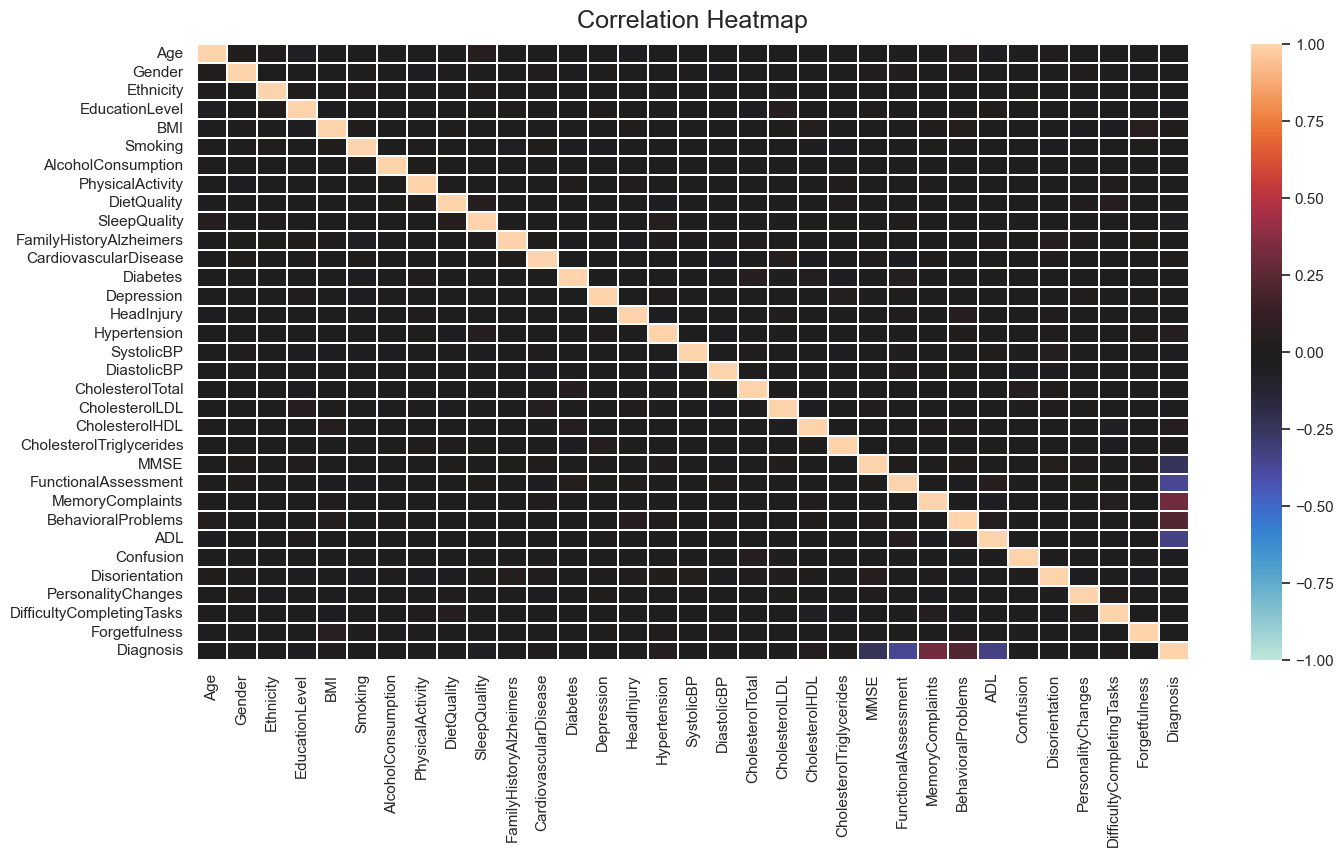

In [86]:
# ref: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(16, 8))
# sns.palplot(sns.color_palette('husl', 10))
heatmap = sns.heatmap(formatted_corr
                      , vmin=-1, vmax=1, annot=False, cmap='icefire', linewidths=0.1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


**This code creates a scatter plot visualization to display pairwise correlations between features.** It uses Seaborn's `relplot` to represent correlations as points. Points are sized and colored based on the strength of the correlation, and axes are adjusted for clarity by rotating labels and removing spines.

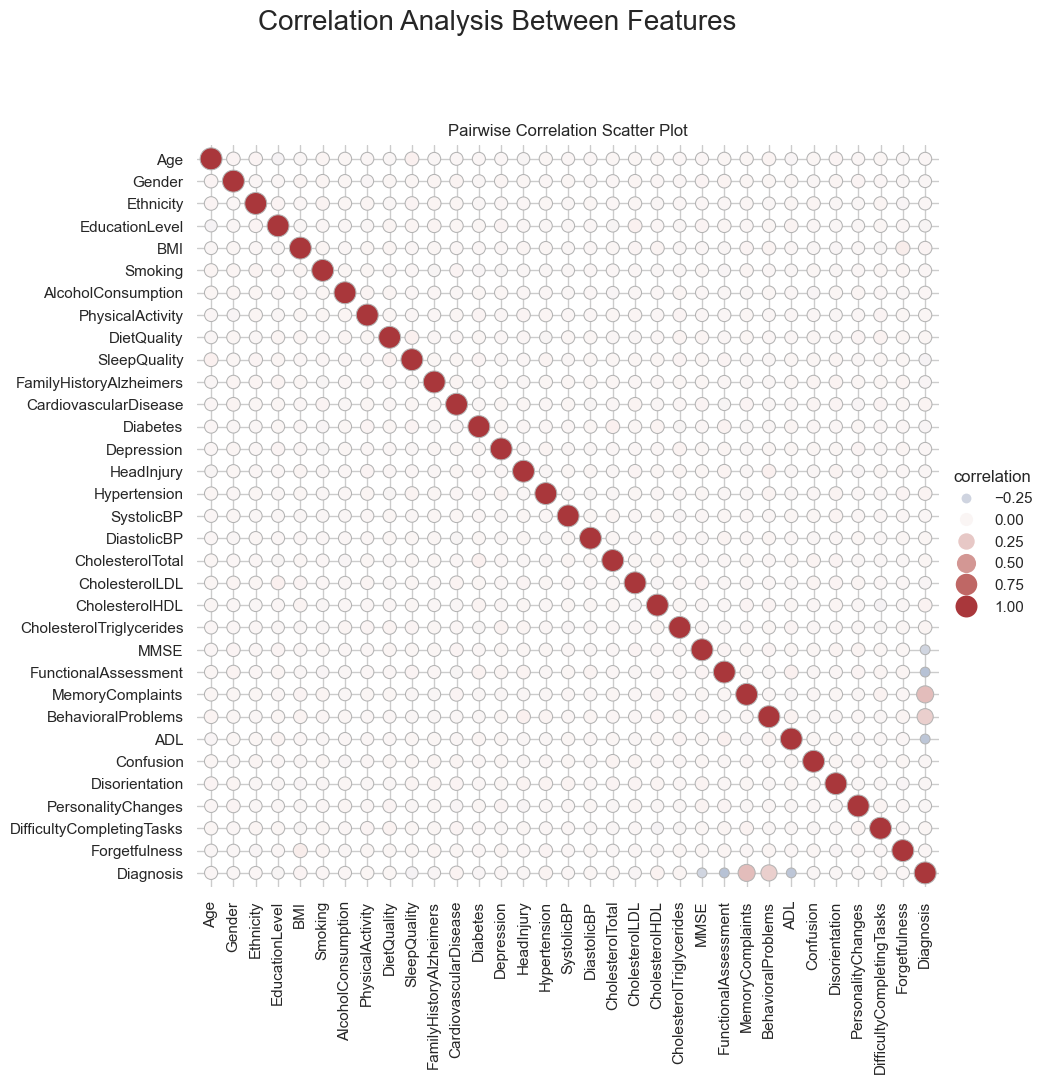

In [92]:
# Ref: https://seaborn.pydata.org/examples/heat_scatter.html

sns.set_theme(style="whitegrid")
corr_mat = data.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.fig.suptitle("Correlation Analysis Between Features", y=1.03, fontsize=20)
g.set(xlabel="", ylabel="", aspect="equal", title="Pairwise Correlation Scatter Plot")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

# Feature Engineering

## Feature Distributions

The objective of this step is to examine the distribution of all features in the dataset to gain insights into their shapes, ranges, and frequencies. Numerical features will be represented using histograms and KDE plots to observe their spread and central tendencies. Additionally, categorical features may be visualized using bar plots to highlight their unique value counts or proportions. Understanding these distributions helps identify potential outliers, skewness, and patterns for further analysis.

**This code visualizes the distributions of numerical and categorical features in the dataset.**

1. **Numerical features:** Histograms are plotted for all numerical columns to observe their range and spread.
2. **Categorical features:** Count plots are created for categorical columns or low-cardinality numerical features, laid out in a grid for concise visualization.

Unused subplots are removed, and the layout is adjusted for clarity.

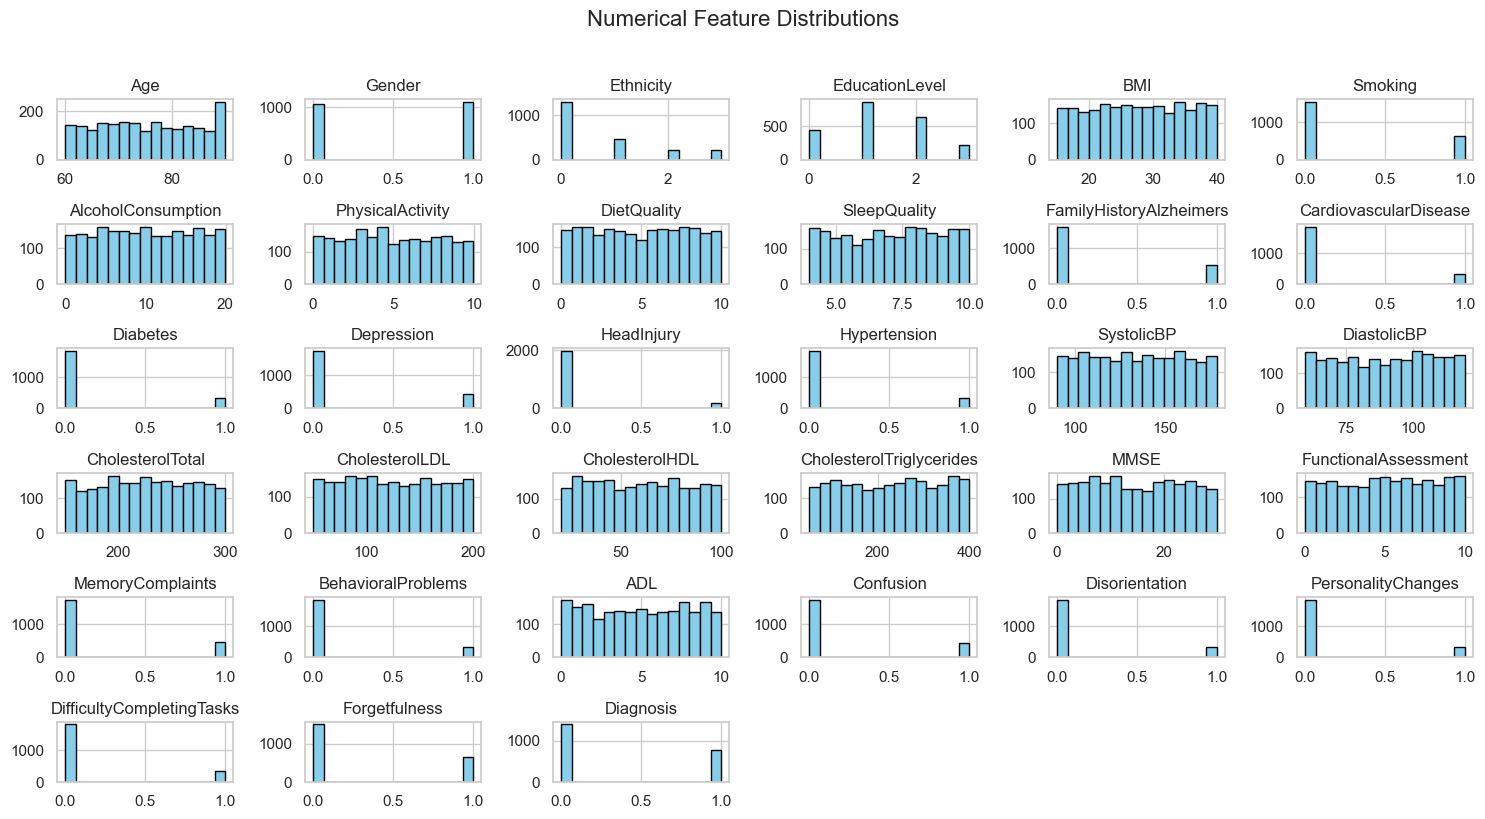

/var/folders/kg/7815816j6mjbpnxcp5bgvx9r0000gn/T/ipykernel_27493/2548067560.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1.0)  # UserWarning: Adjusted layout to tight with padding


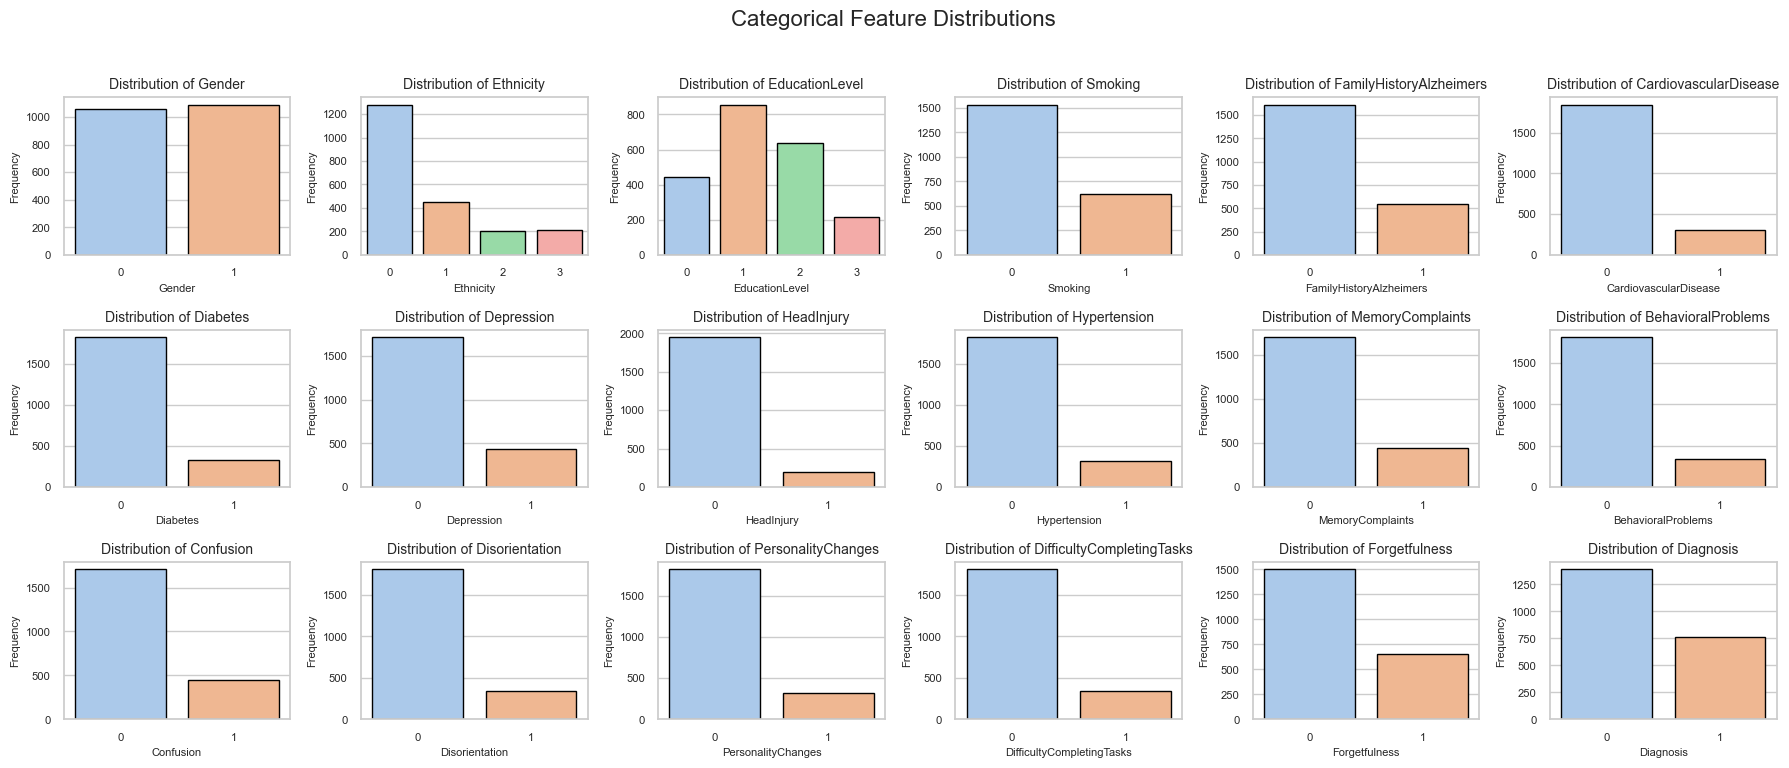

In [74]:
# Separate plots for categorical and numeric features with six plots in a row for compact layouts

# Plot numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
data[numerical_features].hist(figsize=(15, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Numerical Feature Distributions", y=1.02, fontsize=16)
plt.tight_layout(pad=1.0)
plt.show()

# Plot categorical features
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist() + \
                       [col for col in data.columns if data[col].nunique() < 10]  # Add low-cardinality numerical features

n_cols = 6  # Six plots in a row
n_rows = -(-len(categorical_features) // n_cols)  # Calculate number of rows (ceiling division)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 2.5), constrained_layout=True)
fig.suptitle("Categorical Feature Distributions", y=1.02, fontsize=16)

# Flatten the axes for easier indexing
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=data[feature], hue=data[feature], ax=axes[i], palette='pastel', edgecolor='black', legend=False)
    axes[i].set_title(f"Distribution of {feature}", fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=8)
    axes[i].set_xlabel(feature, fontsize=8)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].remove()

plt.tight_layout(pad=1.0)  # UserWarning: Adjusted layout to tight with padding
plt.show()

# EDA Summary

The Exploratory Data Analysis (EDA) performed above included the following steps:

1. **Data Cleaning:**
   - Dropped irrelevant columns (`PatientID` and `DoctorInCharge`) for simplified analysis.
   - Checked for missing values (`Null`/`NaN`) and confirmed there were none.
   - Verified data types of all columns to ensure consistency.
   - Checked for duplicate rows and confirmed there were none in the dataset.

2. **Target Variable Inspection:**
   - Analyzed the `Diagnosis` column, which is the target variable for identifying Alzheimer's disease.
   - Ensured the target variable's class distribution was imbalanced, with 1389 negative cases (0) and 760 positive cases (1).

3. **Data Visualizations:**
   - Generated a correlation matrix and visualized it using a heatmap to understand relationships between features.
   - Created scatter plots for pairwise feature correlations to identify patterns.

4. **Feature Distributions:**
   - Visualized the distributions of numerical features using histograms to observe their spread and identify potential outliers.
   - Examined the distributions of categorical features using count plots.

The analysis provided vital insights into our dataset's structure, distribution, and relationships, laying the groundwork for feature engineering and predictive modeling. The identified class imbalance in the target variable will require attention during modeling.

In [ ]:
# Models